# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
print data

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [7 0 0 ..., 0 0 0]
 [6 0 0 ..., 0 0 0]
 [9 0 0 ..., 0 0 0]]


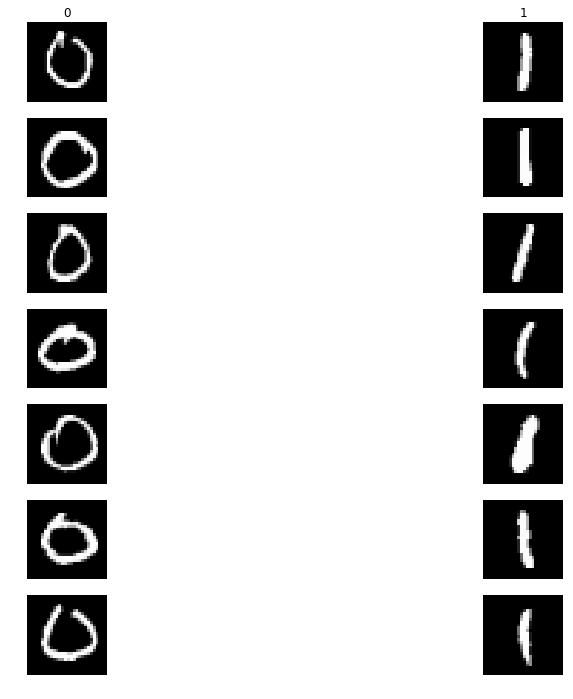

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
print data.shape
#42000,784(28*28)

print imgs.shape
print labels

(42000, 785)
(42000, 784)
[1 0 1 ..., 7 6 9]


# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [5]:
# transform the labels to binary
#非0数字的标签值为 1，0 为  0
#将问题转化为2分类

for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1

# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
#在训练集的所有数据的最后加了一个1


print X_train.shape
print X_test.shape


(28000, 785)
(14000, 785)


In [6]:
X_train_feats = (X_train-np.mean(X_train))/ (np.max(X_train)-np.min(X_train))# choose and extract features
X_test_feats = (X_test-np.mean(X_test))/(np.max(X_test)-np.min(X_test)) # choose and extract features

In [7]:
print np.min(X_test_feats)
print np.max(X_train_feats)
print y_test.shape

-0.13107344859
0.86925657175
(14000,)


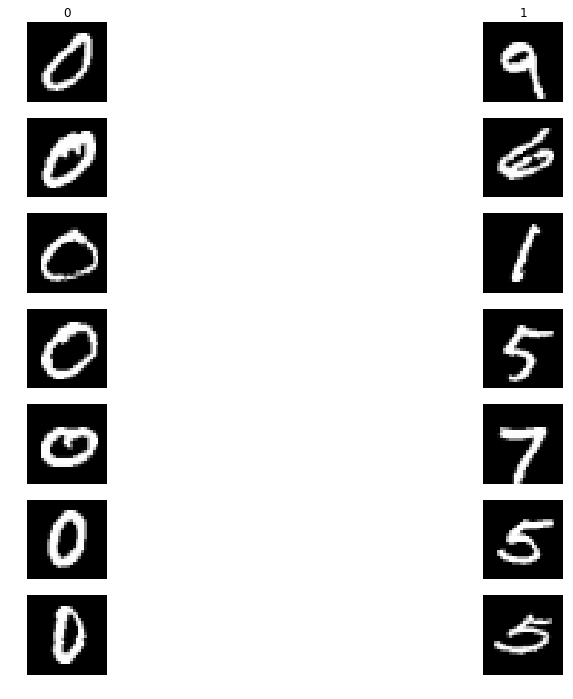

In [8]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
print y_test

[1 1 1 ..., 1 1 1]


In [10]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 2000,
    batch_size = 64,
)

iteration 0 / 2000: loss 0.696202
iteration 100 / 2000: loss 0.428358
iteration 200 / 2000: loss 0.310908
iteration 300 / 2000: loss 0.259407
iteration 400 / 2000: loss 0.202781
iteration 500 / 2000: loss 0.176757
iteration 600 / 2000: loss 0.199184
iteration 700 / 2000: loss 0.155271
iteration 800 / 2000: loss 0.216755
iteration 900 / 2000: loss 0.163480
iteration 1000 / 2000: loss 0.152868
iteration 1100 / 2000: loss 0.169537
iteration 1200 / 2000: loss 0.133842
iteration 1300 / 2000: loss 0.138577
iteration 1400 / 2000: loss 0.192526
iteration 1500 / 2000: loss 0.105091
iteration 1600 / 2000: loss 0.150199
iteration 1700 / 2000: loss 0.193005
iteration 1800 / 2000: loss 0.173010
iteration 1900 / 2000: loss 0.135016


In [11]:
y_test_pred = classifier.predict(X_test_feats)
print "The accuracy socre is ", np.mean(y_test == y_test_pred)

The accuracy socre is  0.959928571429


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [12]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'
TP=np.sum((y_test_pred==y_test))#相关正类被检索
FP=TP-np.sum(y_test_pred)          #无关正类被检索
FN=TP-np.sum(y_test)                     #相关正类未被检索
precision=TP/(TP+FP)
recall=TP/(TP+float(FN))
#######Your code here########
print TP,FP,FN
print precision
print recall
print 'F1:', precision*recall*2/(precision+recall)

13439 337.0 850
0.975537166086
0.940513681853
F1: 0.95770532692


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [13]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000, 785)
(14000, 785)


In [14]:
X_train_feats = (X_train-np.mean(X_train))/ (np.max(X_train)-np.min(X_train))# choose and extract features
X_test_feats = (X_test-np.mean(X_test))/(np.max(X_test)-np.min(X_test)) # choose and extract features

In [15]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
loss=classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters =2000,
    batch_size = 64,
)

关于数字 “0” 的分类器的loss
iteration 0 / 2000: loss 0.693307
iteration 100 / 2000: loss 0.421391
iteration 200 / 2000: loss 0.321426
iteration 300 / 2000: loss 0.249664
iteration 400 / 2000: loss 0.202749
iteration 500 / 2000: loss 0.202844
iteration 600 / 2000: loss 0.179201
iteration 700 / 2000: loss 0.160334
iteration 800 / 2000: loss 0.172704
iteration 900 / 2000: loss 0.160467
iteration 1000 / 2000: loss 0.168445
iteration 1100 / 2000: loss 0.170914
iteration 1200 / 2000: loss 0.132019
iteration 1300 / 2000: loss 0.164032
iteration 1400 / 2000: loss 0.149079
iteration 1500 / 2000: loss 0.109813
iteration 1600 / 2000: loss 0.158116
iteration 1700 / 2000: loss 0.104164
iteration 1800 / 2000: loss 0.134881
iteration 1900 / 2000: loss 0.186506
关于数字 “1” 的分类器的loss
iteration 0 / 2000: loss 0.691502
iteration 100 / 2000: loss 0.426322
iteration 200 / 2000: loss 0.287094
iteration 300 / 2000: loss 0.252362
iteration 400 / 2000: loss 0.194064
iteration 500 / 2000: loss 0.178497
iteration 600 / 2000

In [16]:
y_test_pred = classifier.predict_one_vs_all(X_test_feats)
print y_test
print y_test_pred

[3 1 3 ..., 7 6 9]
[ 3.  1.  3. ...,  7.  6.  9.]


In [17]:
# you may change your code in function `predict`
y_test_pred = classifier.predict_one_vs_all(X_test_feats)
print "The accruacy socre is ", np.mean(y_test == y_test_pred)

The accruacy socre is  0.800214285714


In [18]:
#重新又写了另一个one_vs_all_with_l2函数
#向代价函数中插入了L2正则化

loss1=[]
classifier1 = LogisticRegression()
loss1=classifier1.one_vs_all_with_l2(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters =2000,
    batch_size = 64,
    Lambda=0.00001,
)


关于数字 “0” 的分类器的loss
iteration 0 / 2000: loss 0.690583
iteration 200 / 2000: loss 0.295384
iteration 400 / 2000: loss 0.227008
iteration 600 / 2000: loss 0.169671
iteration 800 / 2000: loss 0.188165
iteration 1000 / 2000: loss 0.156677
iteration 1200 / 2000: loss 0.217912
iteration 1400 / 2000: loss 0.155693
iteration 1600 / 2000: loss 0.191990
iteration 1800 / 2000: loss 0.130983
关于数字 “1” 的分类器的loss
iteration 0 / 2000: loss 0.695088
iteration 200 / 2000: loss 0.287271
iteration 400 / 2000: loss 0.228774
iteration 600 / 2000: loss 0.238200
iteration 800 / 2000: loss 0.167022
iteration 1000 / 2000: loss 0.171225
iteration 1200 / 2000: loss 0.138112
iteration 1400 / 2000: loss 0.156627
iteration 1600 / 2000: loss 0.161149
iteration 1800 / 2000: loss 0.121316
关于数字 “2” 的分类器的loss
iteration 0 / 2000: loss 0.698910
iteration 200 / 2000: loss 0.303979
iteration 400 / 2000: loss 0.226276
iteration 600 / 2000: loss 0.176131
iteration 800 / 2000: loss 0.176404
iteration 1000 / 2000: loss 0.157336
it

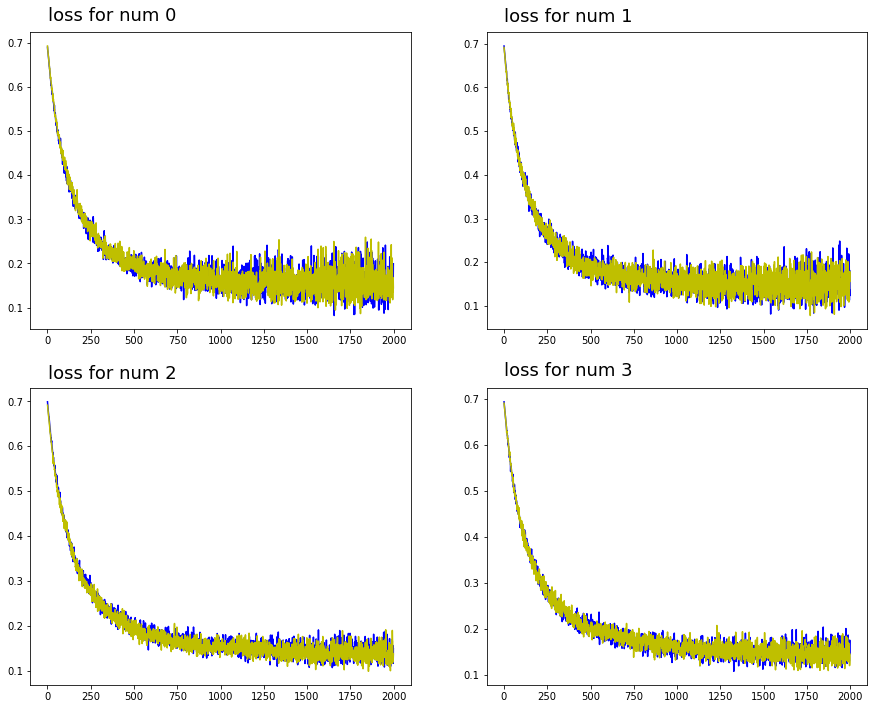

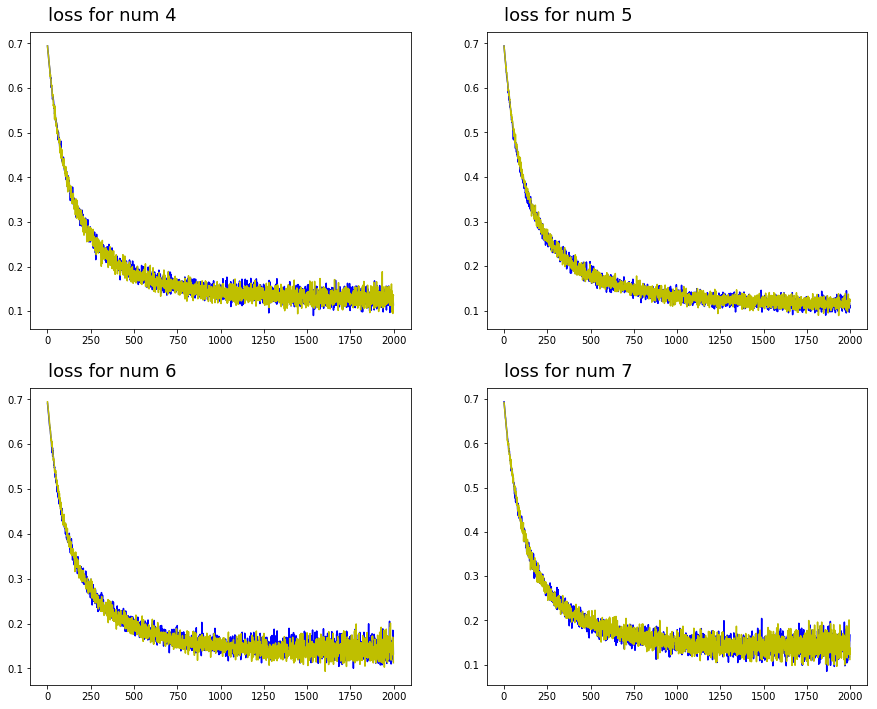

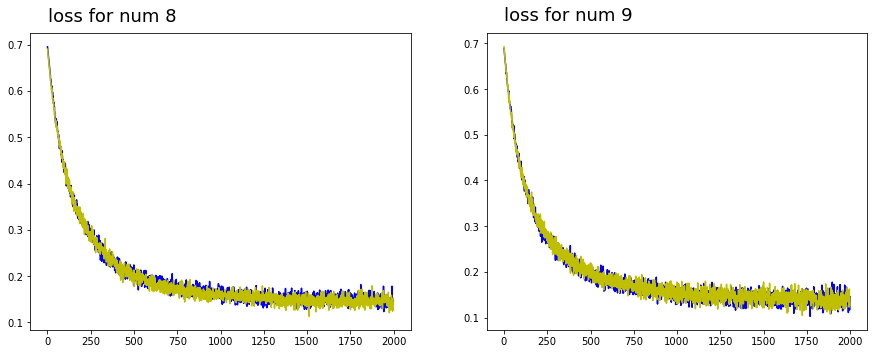

In [21]:
#下面看看两个代价函数的对比效果
fig=[]
for i in range(3):
    fig.append(plt.figure())
sum=0
for i in range(3):
    ax=[]
    for j in range(4):
        ax=fig[i].add_subplot(2,2,j+1)
        ax.plot(loss1[sum],c='blue',label="$with L2 Regularization")
        ax.plot(loss[sum],c='y',label="$None L2 Regularization$")
        ax.text(0.35,0.75,u"loss for num %d"%sum,fontsize=18)
        sum=sum+1
        if (sum==10):break

In [20]:
y_test_pred1 = classifier1.predict_one_vs_all(X_test_feats)

print "The accruacy socre is ", np.mean(y_test == y_test_pred1)

The accruacy socre is  0.797642857143
